# Import libraries

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [27]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/star-dataset/6 class csv.csv


# Import dataset as a pandas dataframe

In [28]:
# Load dataset
df = pd.read_csv("/kaggle/input/star-dataset/6 class csv.csv")

# Data exploration

Before building a classification model, it is essential to explore and understand the dataset to identify patterns, relationships, and potential preprocessing needs. This section focuses on analyzing the dataset’s structure, checking for missing values, visualizing distributions, and understanding feature correlations.

### Dataset Overview

We begin by displaying its first few rows to understand its structure and the type of data it contains.

In [29]:
# Display basic information about the dataset
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


### Checking for Missing Values and duplicates
Missing data can impact model performance. We check for missing values to determine if any preprocessing steps, such as imputation or removal, are needed.

In [30]:
# Check for missing values
df.isnull().sum()


Temperature (K)           0
Luminosity(L/Lo)          0
Radius(R/Ro)              0
Absolute magnitude(Mv)    0
Star type                 0
Star color                0
Spectral Class            0
dtype: int64

We have no missing values :

In [31]:
df.duplicated().sum()


0

No duplicates

### Statistical Summary

Generating summary statistics provides insights into the range, mean, and distribution of numerical features.

In [32]:
# Summary statistics of numerical features
df.describe()


,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


### Data distribution

visualization : A bar plot can help visually assess whether the classes are balanced: 

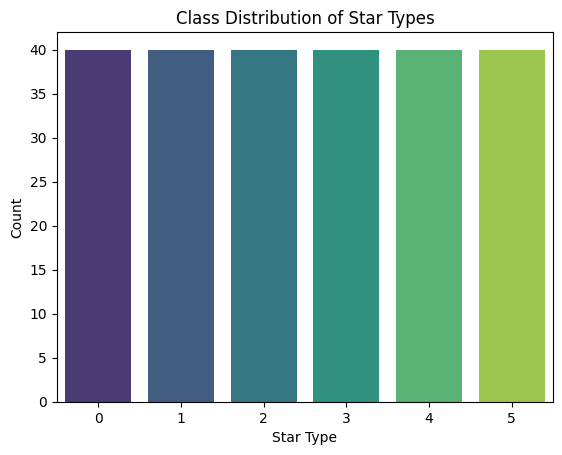

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the occurrences of each star type{}
sns.countplot(x=df['Star type'], palette='viridis')
plt.xlabel("Star Type")
plt.ylabel("Count")
plt.title("Class Distribution of Star Types")
plt.show()


The dataset is well balanced between the different classes

### Feature Correlation Analysis

Encoding categorical variables as numerical to plot the correlation matrix

In [34]:
le_color = LabelEncoder()
df['Star color'] = le_color.fit_transform(df['Star color'])

le_spectral = LabelEncoder()
df['Spectral Class'] = le_spectral.fit_transform(df['Spectral Class'])

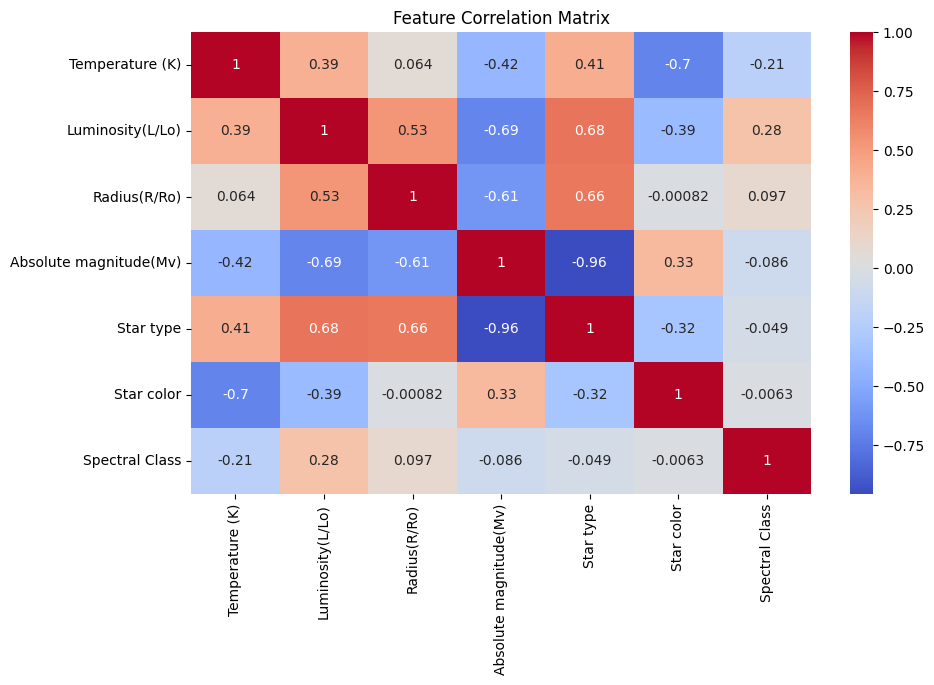

In [35]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

### Visualizing Feature Distributions

To understand how features vary across different star types, we use histograms and boxplots.

Temperature Distribution :


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


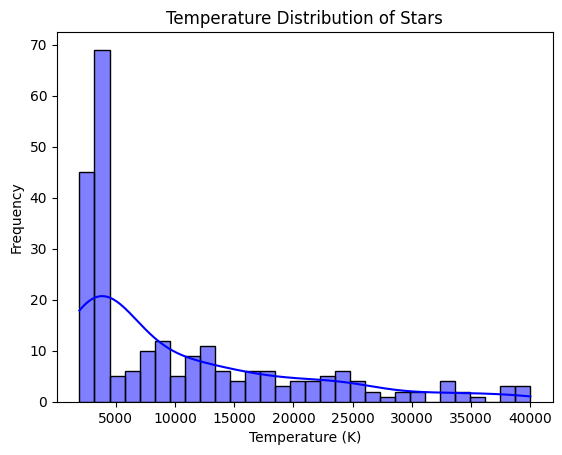

In [36]:
sns.histplot(df['Temperature (K)'], bins=30, kde=True, color='blue')
plt.title("Temperature Distribution of Stars")
plt.xlabel("Temperature (K)")
plt.ylabel("Frequency")
plt.show()


Luminosity vs. Star Type

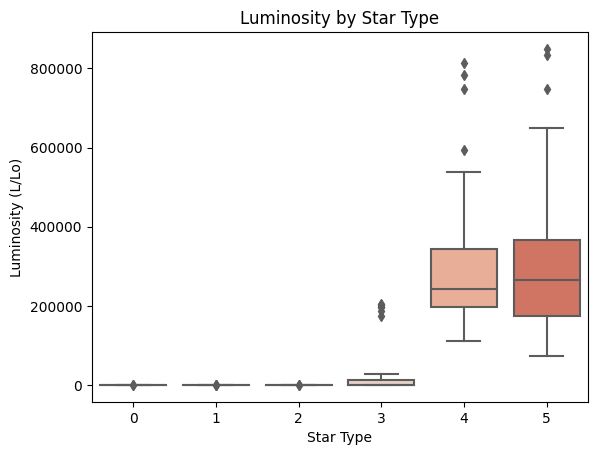

In [37]:
sns.boxplot(x=df['Star type'], y=df['Luminosity(L/Lo)'], palette='coolwarm')
plt.title("Luminosity by Star Type")
plt.xlabel("Star Type")
plt.ylabel("Luminosity (L/Lo)")
plt.show()


## Data cleaning

* Replace spaces with underscores
This ensures consistency and prevents issues when referencing columns in code.
* Rename specific columns
We remove the parentheses to make column names cleaner and easier to work with.

In [38]:
# Replace spaces with underscores
df.columns = df.columns.str.replace(" ", "_")

# Rename specific columns by removing parentheses
df.rename(columns={
    "Temperature_(K)": "Temperature",
    "Luminosity(L/Lo)": "Luminosity",
    "Radius(R/Ro)": "Radius",
    "Absolute_magnitude(Mv)": "Absolute_magnitude"
}, inplace=True)

# Display the updated column names
print(df.columns)


Index(['Temperature', 'Luminosity', 'Radius', 'Absolute_magnitude',
       'Star_type', 'Star_color', 'Spectral_Class'],
      dtype='object')


[

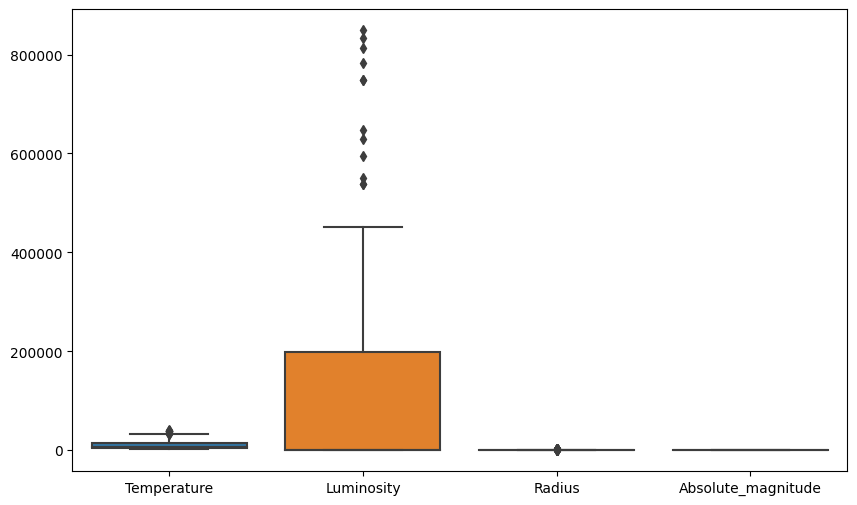

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.boxplot(data=df[['Temperature', 'Luminosity', 'Radius', 'Absolute_magnitude']])
plt.show()


How to Handle Outliers:
Remove extreme outliers using the IQR method.

Since the boxplot shows that Luminosity has extreme outliers, we will remove them using the Interquartile Range (IQR) method. This method works as follows:

In [40]:
import numpy as np

# Define a function to remove outliers based on IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter the dataset
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return filtered_df

# Remove outliers from Luminosity
df_cleaned = remove_outliers(df, "Luminosity")

# Print before and after removing outliers
print(f"Original dataset size: {df.shape[0]} rows")
print(f"Dataset size after outlier removal: {df_cleaned.shape[0]} rows")


Original dataset size: 240 rows
Dataset size after outlier removal: 228 rows


We plot again class ditribution for cleaned dataset (without outliers for luminosity

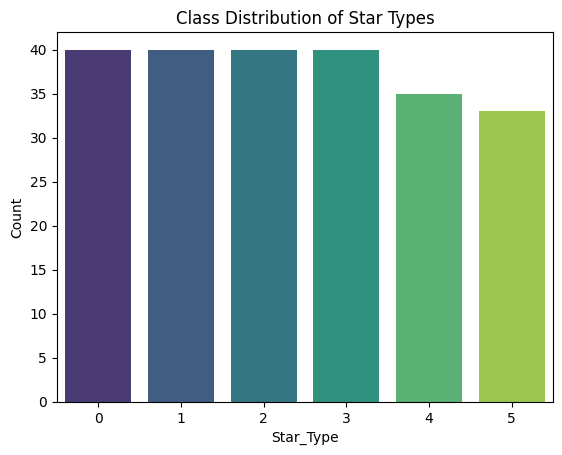

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the occurrences of each star type{}
sns.countplot(x=df_cleaned['Star_type'], palette='viridis')
plt.xlabel("Star_Type")
plt.ylabel("Count")
plt.title("Class Distribution of Star Types")
plt.show()


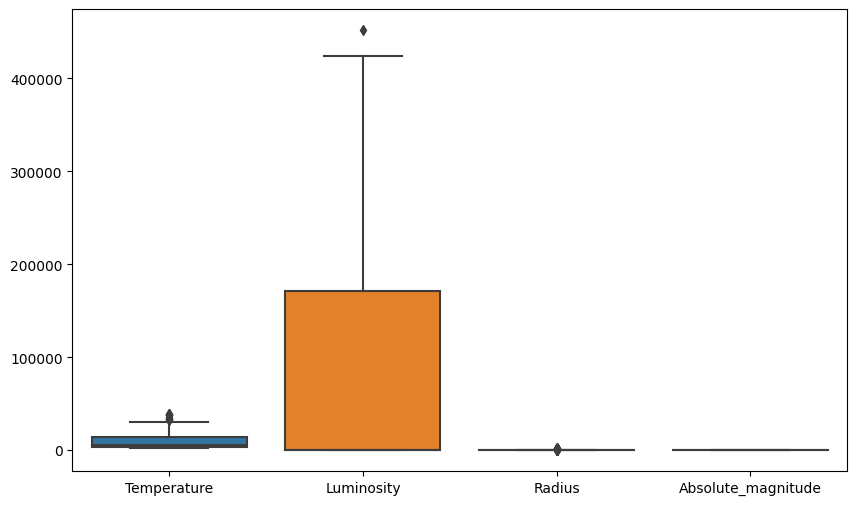

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.boxplot(data=df_cleaned[['Temperature', 'Luminosity', 'Radius', 'Absolute_magnitude']])
plt.show()


As we can see there were outlier values that have been filtered out.

# Binary classification: Selecting two classes


In [42]:
df_binary = df[df['Star_type'].isin([2, 3])]  # Example: White Dwarf vs. Main Sequence
X = df_binary.drop(columns=['Star_type'])
y = df_binary['Star_type']


## Split data


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Standardizing numerical features

In [44]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Train classifier (Random Forest)

In [45]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Evaluation

In [46]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 1.0
[[8 0]
 [0 8]]
              precision    recall  f1-score   support

           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         8

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



# Feature importance

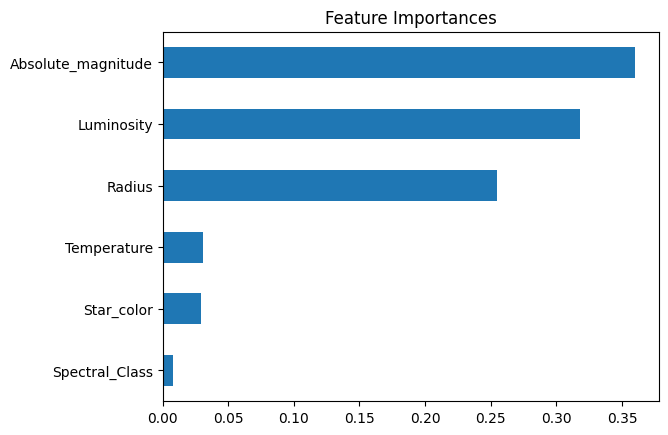

In [47]:
importances = pd.Series(clf.feature_importances_, index=df_binary.drop(columns=['Star_type']).columns)
importances.sort_values().plot(kind='barh', title='Feature Importances')
plt.show()

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Temperature         240 non-null    int64  
 1   Luminosity          240 non-null    float64
 2   Radius              240 non-null    float64
 3   Absolute_magnitude  240 non-null    float64
 4   Star_type           240 non-null    int64  
 5   Star_color          240 non-null    int64  
 6   Spectral_Class      240 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 13.2 KB
